In [3]:

import pandas as pd
import joblib as jl
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pydotplus
from IPython.display import Image

In [4]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Read the CSV file into a Pandas DataFrame
passengers_df = pd.read_csv(
    Path("Titanic-Dataset.csv")   
)

passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
passengers_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
passengers_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
passengers_df_preprocessed = pd.get_dummies(passengers_df)
passengers_df_preprocessed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Create a Random Forest Model with the Original Data

In [9]:
y = passengers_df_preprocessed.Survived
X = passengers_df_preprocessed.drop(columns="Survived")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,131,6
Actual 1,31,55


Accuracy Score : 0.8340807174887892
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       137
           1       0.90      0.64      0.75        86

    accuracy                           0.83       223
   macro avg       0.86      0.80      0.81       223
weighted avg       0.84      0.83      0.83       223



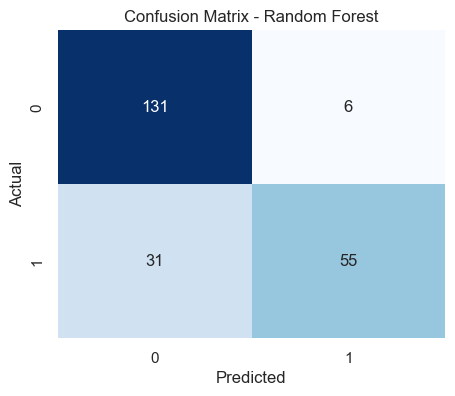

In [16]:
cm = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)


plt.figure(figsize=(5, 4))
sns.set(font_scale=1)  # Adjust font size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [17]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       137
           1       0.90      0.64      0.75        86

    accuracy                           0.83       223
   macro avg       0.86      0.80      0.81       223
weighted avg       0.84      0.83      0.83       223



In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10237424402909527, 'Sex_male'),
 (0.09956643976234049, 'Sex_female'),
 (0.07176001978532753, 'Fare'),
 (0.04755269566698811, 'Pclass'),
 (0.04459432350892082, 'Age'),
 (0.04089674855292179, 'PassengerId'),
 (0.01858188170130429, 'SibSp'),
 (0.017365375210272423, 'Parch'),
 (0.009322019789809876, 'Embarked_S'),
 (0.008764040120969015, 'Embarked_C'),
 (0.004547025512414792, 'Embarked_Q'),
 (0.0045028496587370525, 'Ticket_1601'),
 (0.0031141661634225817, 'Ticket_2661'),
 (0.0027146658979365764, 'Cabin_C22 C26'),
 (0.0026399055081806535, 'Ticket_347082'),
 (0.002599961265380555, 'Ticket_29106'),
 (0.0025874392513398087, 'Name_Stranden, Mr. Juho'),
 (0.0025468776763403183, 'Ticket_7598'),
 (0.002541962006385512, 'Cabin_C52'),
 (0.002474957742102809, 'Cabin_E24'),
 (0.002453933775180961, 'Ticket_2666'),
 (0.002447185654808443, 'Name_Dorking, Mr. Edward Arthur'),
 (0.002414963461740863, 'Ticket_347089'),
 (0.002396296684440312, 'Name_Jonsson, Mr. Carl'),
 (0.0023884569109324056, 'Name_Per

In [19]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros_model.fit_resample(X_train, y_train)

In [23]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 52.4 kB/s eta 0:00:05
   ---- ----------------------------------- 30.7/258.3 kB 52.4 kB/s eta 0:00:05
   ---- ----------------------------------- 30.7/258.3 kB 52.4 kB/s eta 0:00:05
   ---- ----------------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

Survived
0    412
1    412
Name: count, dtype: int64

In [26]:
# Create a random forest classifier
# Assign a random_state parameter of 1 to the model
rf_resampled_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model using the resampled training data
rf_resampled_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
rf_resampled_predictions = rf_resampled_model.predict(X_test)

In [27]:
# Calculating the confusion matrix
cm_resampled = confusion_matrix(y_test, rf_resampled_predictions)
cm_resampled_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_resampled = accuracy_score(y_test, rf_resampled_predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_resampled_df)
print(f"Accuracy Score : {acc_score_resampled}")
print("Classification Report")
print(classification_report(y_test, rf_resampled_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,131,6
Actual 1,31,55


Accuracy Score : 0.8295964125560538
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       137
           1       0.83      0.70      0.76        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

